<img src="AirBnB.png">

# Airbnb Room Price Prediction 

- Airbnb is an online platform that allows people to rent short term accommodation. This ranges from regular people with a spare bedroom to property management firms who lease multiple rentals. On the one side, Airbnb enables owners to list their space and earn rental money. On the other side, it provides travelers easy access to renting private homes.

- Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking, Airbnb charges the guest 6-12% of the booking fee. Moreover, Airbnb charges the host 3% for every successful transaction.

- As a senior data scientist at Airbnb, you have to come up with a pricing model that can effectively predict the Rent for an accommodation and can help hosts, travelers, and also the business in devising profitable strategies.

## Data Dictionary
- 1. `id`: Property ID
- 2. `room_type` Type of Room in the property
- 3. `accommodates` How many adults can this property accomodate
- 4. `bathrooms` Number of bathrooms in the property
- 5. `cancellation_policy` Cancellation policy of the property
- 6. `cleaning_fee` This denotes whether the property's cleaning fee is included in the rent or not
- 7. `instant_bookable` It indicates whether an instant booking facility is available or not
- 8. `review_scores_rating` The review rating score of the property
- 9. `bedrooms Number` of bedrooms in the property
- 10. `beds` Total number of beds in the property
- 11. `log_price` Log of the rental price of the property for a fixed period

### Import Libraries

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

### Load Data

In [250]:
airbnb = pd.read_csv('AirBNB.csv')
airbnb.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.000,1.000,strict,True,f,100.000,1.000,1.000,5.011
1,6304928,Entire home/apt,7.000,1.000,strict,True,t,93.000,3.000,3.000,5.130
2,7919400,Entire home/apt,5.000,1.000,moderate,True,t,92.000,1.000,3.000,4.977
3,13418779,Entire home/apt,4.000,1.000,flexible,True,f,nan,2.000,2.000,6.620
4,3808709,Entire home/apt,2.000,1.000,moderate,True,t,40.000,0.000,1.000,4.745


In [251]:
airbnb.tail()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74106,14549287,Private room,1.000,1.000,flexible,False,f,nan,1.000,1.000,4.605
74107,13281809,Entire home/apt,4.000,2.000,moderate,True,f,93.000,2.000,4.000,5.043
74108,18688039,Entire home/apt,5.000,1.000,moderate,True,t,94.000,2.000,2.000,5.220
74109,17045948,Entire home/apt,2.000,1.000,strict,True,t,nan,0.000,2.000,5.273
74110,3534845,Entire home/apt,4.000,1.000,moderate,False,f,96.000,1.000,2.000,4.852


In [252]:
print('This dataset has', airbnb.shape[0], 'rows/observations, and ', airbnb.shape[1], 'columns')

This dataset has 74111 rows/observations, and  11 columns


In [253]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


Dataset has 7 numerical columns, and 4 categorical columns which there defined as *object*

Dropping `id` column from dataset

In [254]:
airbnb = airbnb.drop(['id'], axis=1)

In [255]:
for col in airbnb.select_dtypes(include=['object']):
    airbnb[col] = airbnb[col].astype('category')

In [256]:
cat_col = airbnb.select_dtypes(include=['category'])

for col in cat_col:
    print('Unique Values of {} are \n'.format(col),airbnb[col].unique())
    print('*'*90)

Unique Values of room_type are 
 ['Entire home/apt', 'Private room', 'Shared room', NaN]
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']
******************************************************************************************
Unique Values of cancellation_policy are 
 ['strict', 'moderate', 'flexible', NaN]
Categories (3, object): ['strict', 'moderate', 'flexible']
******************************************************************************************
Unique Values of cleaning_fee are 
 [True, False, NaN]
Categories (2, object): [True, False]
******************************************************************************************
Unique Values of instant_bookable are 
 ['f', 't']
Categories (2, object): ['f', 't']
******************************************************************************************


In [257]:
airbnb.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.000,NaN,NaN,NaN,3.155,2.154,1.000,2.000,2.000,4.000,16.000
bathrooms,73908.000,NaN,NaN,NaN,1.235,0.582,0.000,1.000,1.000,1.000,8.000
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107,2,True,54399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.000,NaN,NaN,NaN,94.067,7.837,20.000,92.000,96.000,100.000,100.000
bedrooms,74019.000,NaN,NaN,NaN,1.266,0.852,0.000,1.000,1.000,1.000,10.000
beds,73980.000,NaN,NaN,NaN,1.711,1.254,0.000,1.000,1.000,2.000,18.000
log_price,74111.000,NaN,NaN,NaN,4.782,0.717,0.000,4.317,4.710,5.220,7.600


**Quick Insights**
- The most frequent `room_type` is *Entire home/apt*
- `accommodates` has average number of 3 guests, and 75% of the guests are group of 4
- One is the common number of `bathrooms`
- Most places are considering *strict* `canellation_policy`
- Most places are charging `cleaning_fees`
- `instant_bookable` is not preferred by most place-owners
- The average `review_scores_rating` is above 94%
- One is also the common number of `beds'
- `log_price` in average is 4.78 and goes up tp 7.60

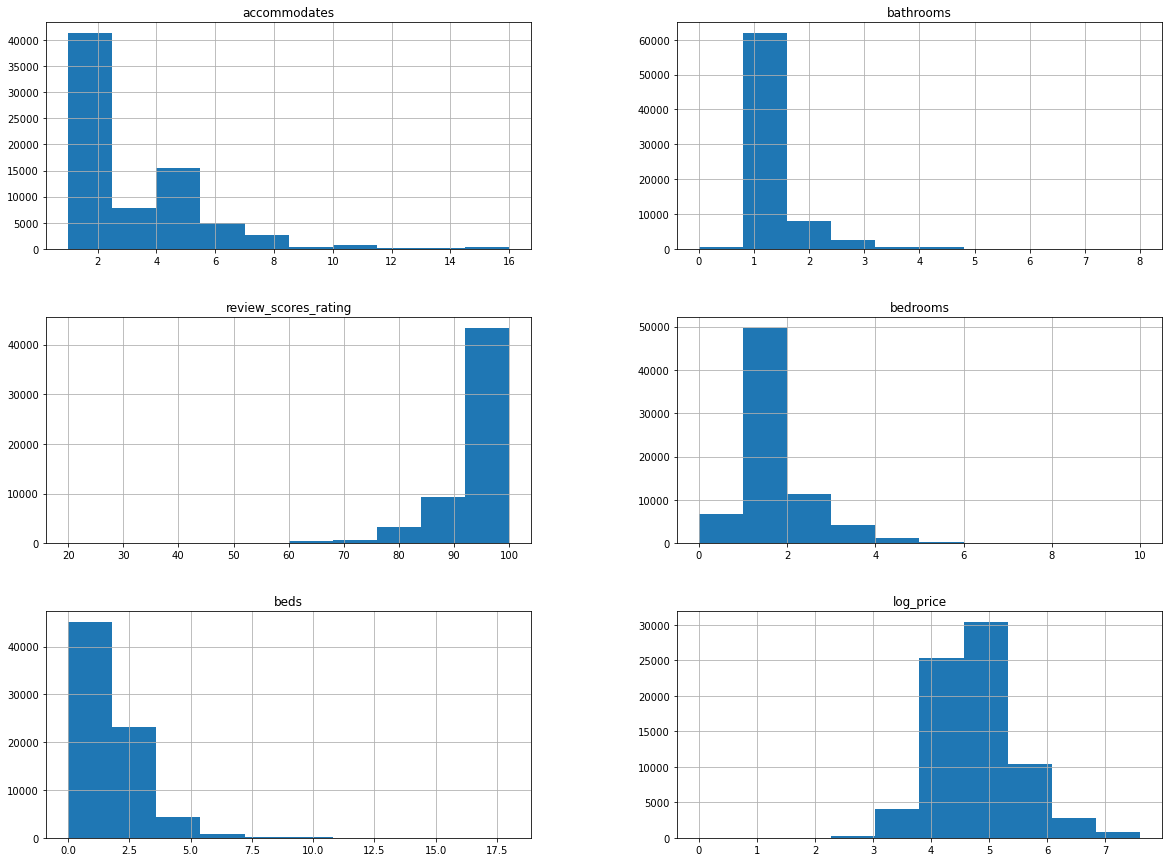

In [78]:
airbnb.hist(figsize=(20,15));

### Creating Training/Test Sets

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
train_set, test_set = train_test_split(airbnb, test_size=0.2, random_state=42)
print(len(train_set), 'rows in training set')
print(len(test_set), 'rows in test set')

59288 rows in training set
14823 rows in test set


### EDA

In [113]:
data = train_set.copy()
data.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
12048,Entire home/apt,4.000,1.500,flexible,False,f,97.000,2.000,3.000,4.500
48255,Entire home/apt,2.000,1.000,strict,True,t,87.000,1.000,1.000,3.807
39959,Entire home/apt,4.000,1.000,strict,True,t,80.000,0.000,2.000,5.075
14926,Private room,2.000,1.000,flexible,True,f,nan,1.000,1.000,4.443
776,Entire home/apt,3.000,1.000,moderate,True,f,99.000,1.000,1.000,4.745


In [114]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(10,8), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [115]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

#### `accommodates`

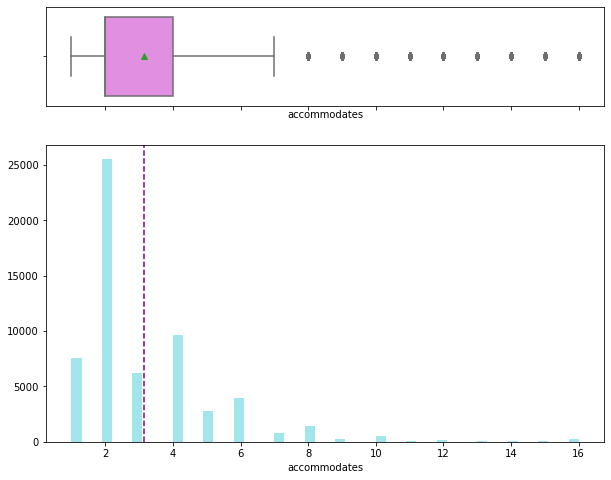

In [116]:
histogram_boxplot(data['accommodates'])

#### `bathrooms`

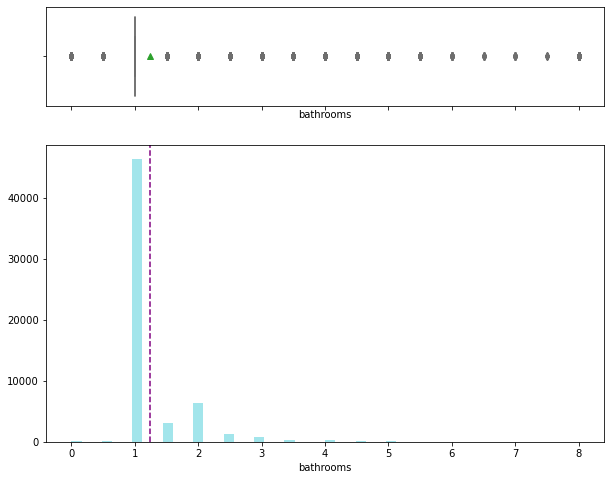

In [117]:
histogram_boxplot(data['bathrooms'])

#### `bedrooms`

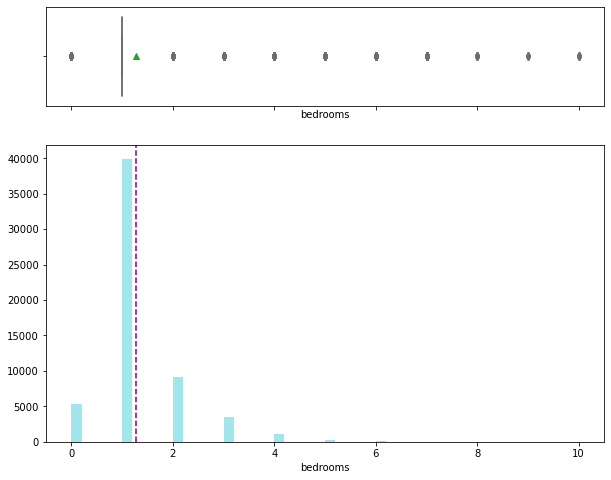

In [118]:
histogram_boxplot(data['bedrooms'])

#### `beds`

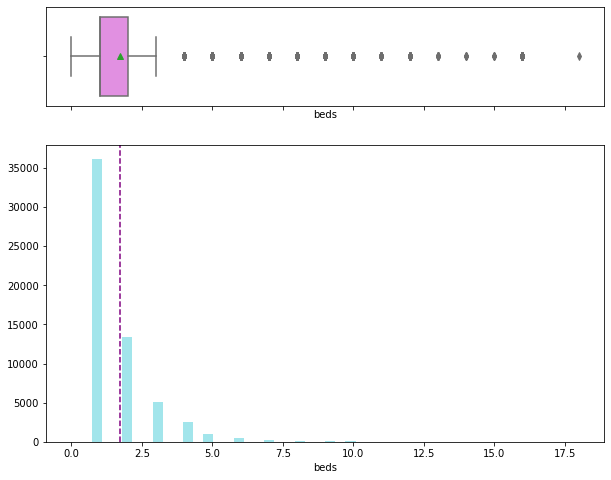

In [119]:
histogram_boxplot(data['beds'])

#### `review_scores_rating`

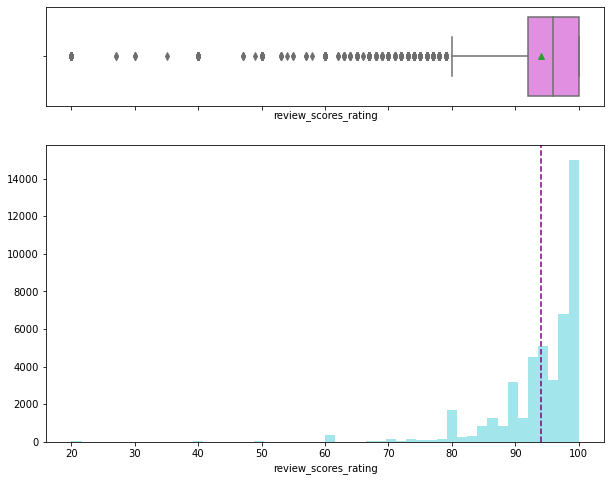

In [120]:
histogram_boxplot(data['review_scores_rating'])

#### `log_price`

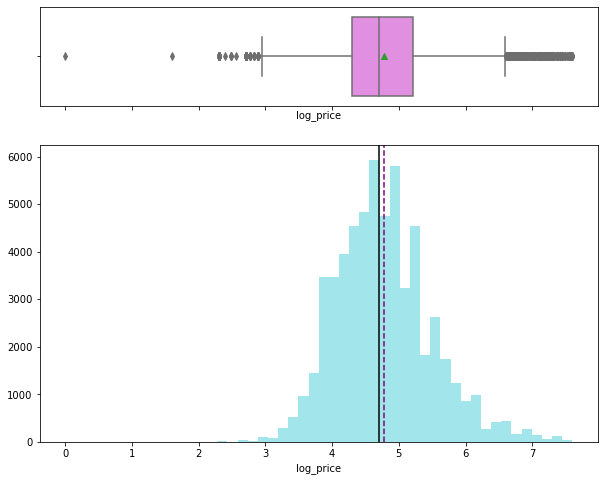

In [121]:
histogram_boxplot(data['log_price'])

#### `room_type`

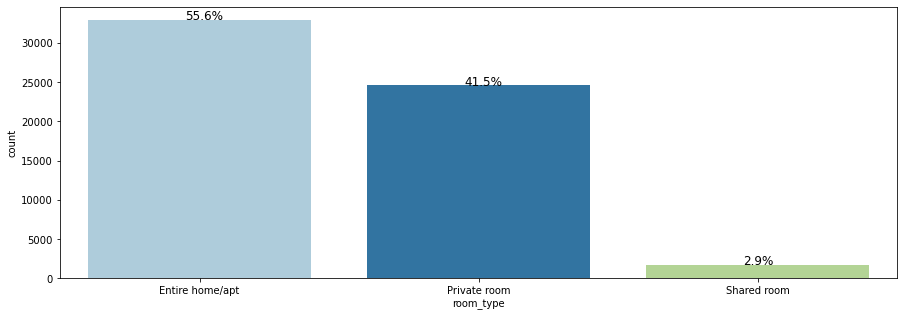

In [122]:
perc_on_bar('room_type')

#### `cancellation_policy`

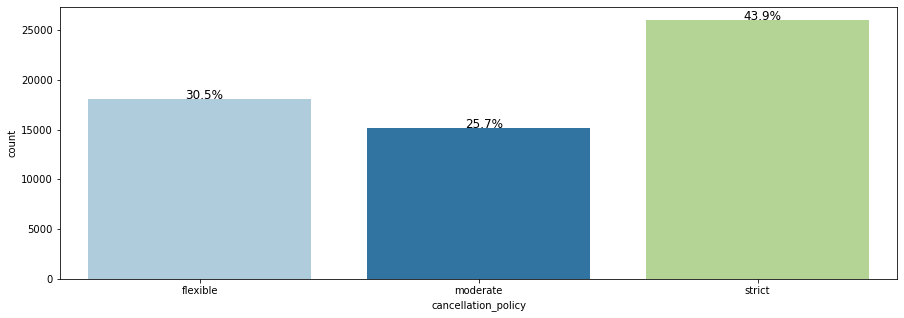

In [123]:
perc_on_bar('cancellation_policy')

#### `cleaning_fee`

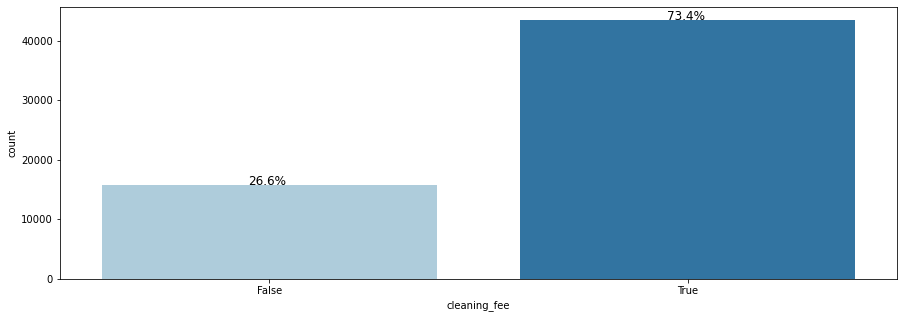

In [124]:
perc_on_bar('cleaning_fee')

#### `instant_bookable`

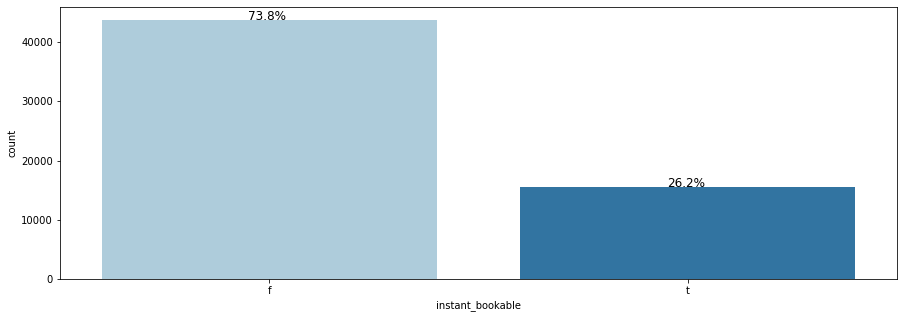

In [125]:
perc_on_bar('instant_bookable')

### Correlation Check

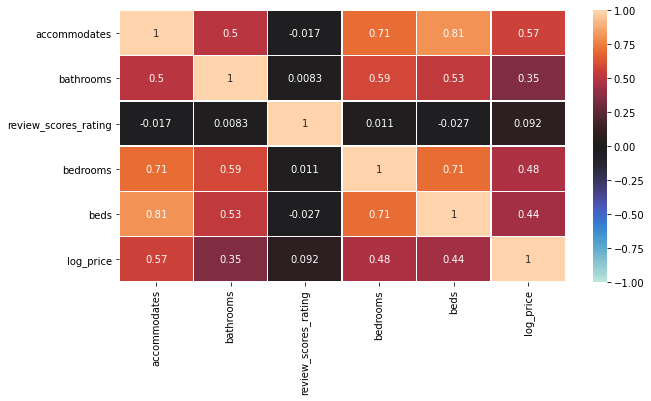

In [126]:
plt.figure(figsize=(10,5))

sns.heatmap(data.corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,
            )

plt.show()

In [127]:
data.corr()['log_price'].sort_values(ascending=False)

log_price              1.000
accommodates           0.569
bedrooms               0.475
beds                   0.444
bathrooms              0.352
review_scores_rating   0.092
Name: log_price, dtype: float64

<Figure size 720x360 with 0 Axes>

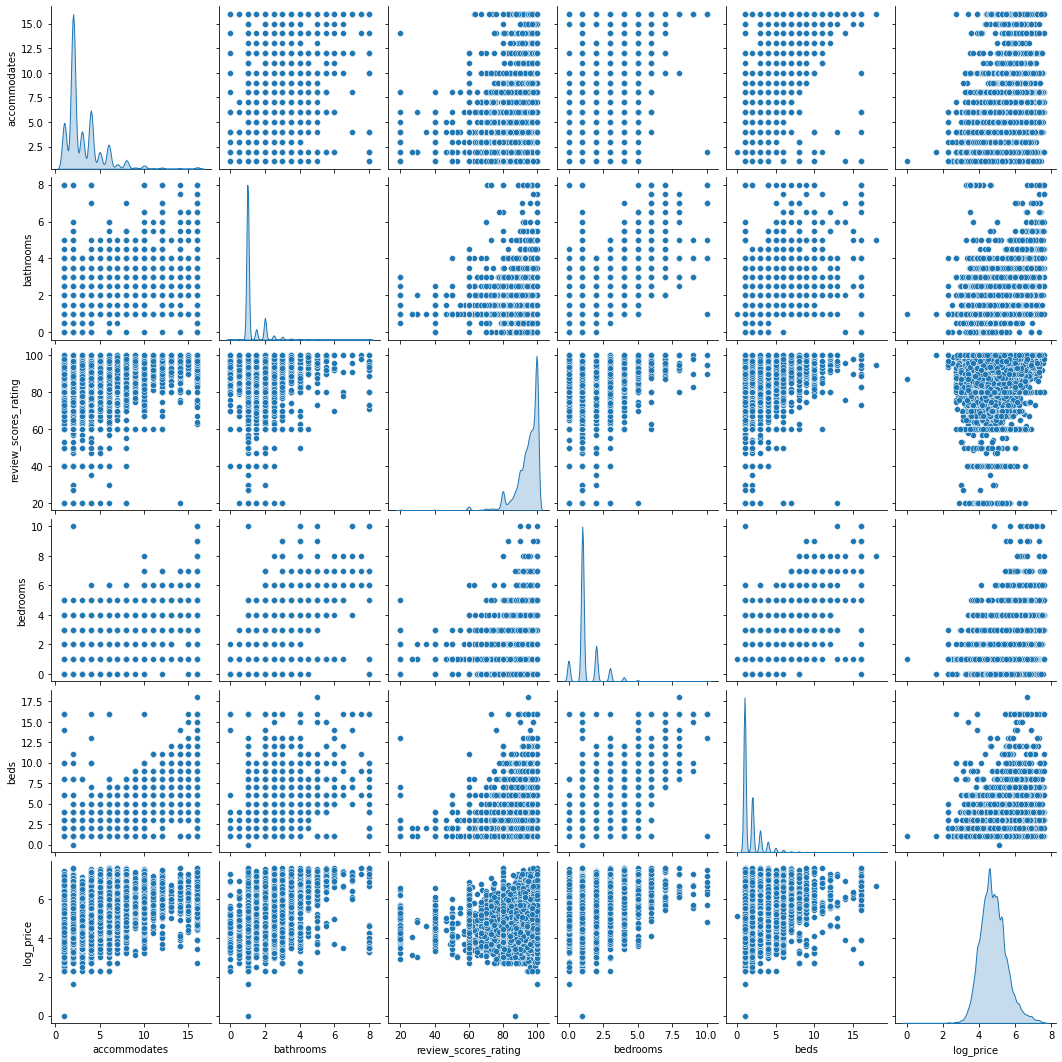

In [128]:
plt.figure(figsize=(10,5))
sns.pairplot(data, diag_kind='kde');

#### Attributes Combinations

In [129]:
data.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

- Checking number of `bedrooms` per number of `accommodates`
- Number of `beds` per numner of `accommodates`
- Number of `bathrooms` per `accommodates`

In [130]:
data['bedrooms_per_accommodates'] = data['bedrooms'] / data['accommodates']
data['beds_per_accommodates'] = data['beds'] / data['accommodates']
data['bathrooms_per_accommodates'] = data['bathrooms'] / data['accommodates']

In [132]:
data[['bedrooms_per_accommodates', 'beds_per_accommodates', 'bathrooms_per_accommodates']].describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms_per_accommodates,59207.000,0.470,0.281,0.000,0.333,0.500,0.500,5.000
beds_per_accommodates,59182.000,0.595,0.300,0.000,0.500,0.500,0.667,16.000
bathrooms_per_accommodates,59126.000,0.511,0.336,0.000,0.333,0.500,0.500,8.000


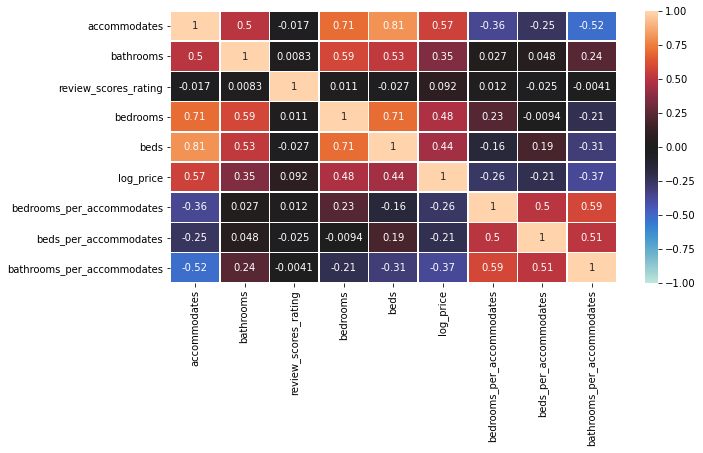

In [133]:
plt.figure(figsize=(10,5))

sns.heatmap(data.corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,
            )

plt.show()

In [134]:
data.corr()['log_price'].sort_values(ascending=False)

log_price                     1.000
accommodates                  0.569
bedrooms                      0.475
beds                          0.444
bathrooms                     0.352
review_scores_rating          0.092
beds_per_accommodates        -0.214
bedrooms_per_accommodates    -0.264
bathrooms_per_accommodates   -0.373
Name: log_price, dtype: float64

`bathrooms_per_accommodates` gives strong correlatio with `log_price` at -0.373, which is even stronger than number of `bathrooms` in the original dataset

### Data Cleaning 

#### Numeric Data

In [135]:
data = train_set.drop('log_price', axis=1)
data_labels = train_set['log_price'].copy()

In [137]:
data_num = data.drop(['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable'], axis=1)

In [138]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59288 entries, 12048 to 15795
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accommodates          59286 non-null  float64
 1   bathrooms             59126 non-null  float64
 2   review_scores_rating  45893 non-null  float64
 3   bedrooms              59209 non-null  float64
 4   beds                  59184 non-null  float64
dtypes: float64(5)
memory usage: 2.7 MB


In [139]:
data_num.isnull().sum()

accommodates                2
bathrooms                 162
review_scores_rating    13395
bedrooms                   79
beds                      104
dtype: int64

In [140]:
# Using the SimpleImputer function to find the values using the Median Strategy

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [141]:
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [142]:
imputer.statistics_

array([ 2.,  1., 96.,  1.,  1.])

In [143]:
data_num.median().values

array([ 2.,  1., 96.,  1.,  1.])

In [144]:
X = imputer.transform(data_num)

In [145]:
# Converting the transformed array into dataset

data_tr = pd.DataFrame(X, columns=data_num.columns, index=data_num.index)

In [176]:
data_tr.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds
12048,4.000,1.500,97.000,2.000,3.000
48255,2.000,1.000,87.000,1.000,1.000
39959,4.000,1.000,80.000,0.000,2.000
14926,2.000,1.000,96.000,1.000,1.000
776,3.000,1.000,99.000,1.000,1.000


In [146]:
# Double checking with info()

data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59288 entries, 12048 to 15795
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accommodates          59288 non-null  float64
 1   bathrooms             59288 non-null  float64
 2   review_scores_rating  59288 non-null  float64
 3   bedrooms              59288 non-null  float64
 4   beds                  59288 non-null  float64
dtypes: float64(5)
memory usage: 2.7 MB


#### Categorical Data

In [147]:
data_cat = data[['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable']]
data_cat.head(10)

,room_type,cancellation_policy,cleaning_fee,instant_bookable
12048,Entire home/apt,flexible,False,f
48255,Entire home/apt,strict,True,t
39959,Entire home/apt,strict,True,t
14926,Private room,flexible,True,f
776,Entire home/apt,moderate,True,f
53709,Entire home/apt,flexible,True,t
73403,Private room,moderate,False,f
20768,Entire home/apt,flexible,False,f
43706,Entire home/apt,moderate,True,t
30231,Entire home/apt,moderate,True,t


In [149]:
data_cat.isnull().sum()

room_type              4
cancellation_policy    5
cleaning_fee           3
instant_bookable       0
dtype: int64

In [150]:
cat_imputer = SimpleImputer(strategy='most_frequent')

In [151]:
cat_imputer.fit(data_cat)

SimpleImputer(strategy='most_frequent')

In [153]:
cat_imputer.statistics_

array(['Entire home/apt', 'strict', True, 'f'], dtype=object)

In [155]:
data_cat.mode().values

array([['Entire home/apt', 'strict', True, 'f']], dtype=object)

In [156]:
X_cat = cat_imputer.transform(data_cat)

In [159]:
# Converting the transformed array into dataset

data_cat_fil = pd.DataFrame(X_cat, columns=data_cat.columns, index=data_cat.index)
data_cat_fil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59288 entries, 12048 to 15795
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   room_type            59288 non-null  object
 1   cancellation_policy  59288 non-null  object
 2   cleaning_fee         59288 non-null  object
 3   instant_bookable     59288 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


In [160]:
# Encoding the Categorical values with OneHotEncoder function from Scikit-Learn

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [161]:
data_cat_1hot = cat_encoder.fit_transform(data_cat_fil)
data_cat_1hot

<59288x10 sparse matrix of type '<class 'numpy.float64'>'
	with 237152 stored elements in Compressed Sparse Row format>

In [162]:
# Showing the encoded values in an array

data_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [163]:
cat_encoder.categories_

[array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object),
 array(['flexible', 'moderate', 'strict'], dtype=object),
 array([False, True], dtype=object),
 array(['f', 't'], dtype=object)]

### Feature Scaling and Transformations

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59288 entries, 12048 to 15795
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   room_type             59284 non-null  category
 1   accommodates          59286 non-null  float64 
 2   bathrooms             59126 non-null  float64 
 3   cancellation_policy   59283 non-null  category
 4   cleaning_fee          59285 non-null  category
 5   instant_bookable      59288 non-null  category
 6   review_scores_rating  45893 non-null  float64 
 7   bedrooms              59209 non-null  float64 
 8   beds                  59184 non-null  float64 
dtypes: category(4), float64(5)
memory usage: 2.9 MB


In [178]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59288 entries, 12048 to 15795
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accommodates          59286 non-null  float64
 1   bathrooms             59126 non-null  float64
 2   review_scores_rating  45893 non-null  float64
 3   bedrooms              59209 non-null  float64
 4   beds                  59184 non-null  float64
dtypes: float64(5)
memory usage: 2.7 MB


In [165]:
from sklearn.base import BaseEstimator, TransformerMixin

In [168]:
# Getting the required indices

col_names = "accommodates", "bathrooms", "bedrooms", "beds"
accommodates_ix, bathrooms_ix, bedrooms_ix, beds_ix = [
    data.columns.get_loc(c) for c in col_names] # get the column indices

In [171]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bathrooms_per_accommodates=True): # no *args or **kargs
        self.add_bathrooms_per_accommodates = add_bathrooms_per_accommodates
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        bedrooms_per_accommodates = X[:, bedrooms_ix] / X[:, accommodates_ix]
        beds_per_accommodates = X[:, beds_ix] / X[:, accommodates_ix]
        if self.add_bathrooms_per_accommodates:
            bathrooms_per_accommodates = X[:, bathrooms_ix] / X[:, accommodates_ix]
            return np.c_[X, bedrooms_per_accommodates, beds_per_accommodates,
                         bathrooms_per_accommodates]
        else:
            return np.c_[X, bedrooms_per_accommodates, beds_per_accommodates]

attr_adder = CombinedAttributesAdder(add_bathrooms_per_accommodates=False)
airbnb_extra_attribs = attr_adder.transform(data.values)

In [172]:
airbnb_extra_attribs

array([['Entire home/apt', 4.0, 1.5, ..., 3.0, 0.5, 0.75],
       ['Entire home/apt', 2.0, 1.0, ..., 1.0, 0.5, 0.5],
       ['Entire home/apt', 4.0, 1.0, ..., 2.0, 0.0, 0.5],
       ...,
       ['Entire home/apt', 5.0, 2.0, ..., 2.0, 0.4, 0.4],
       ['Private room', 2.0, 1.0, ..., 1.0, 0.5, 0.5],
       ['Private room', 2.0, 1.0, ..., 1.0, 0.5, 0.5]], dtype=object)

In [173]:
airbnb_extra_attribs = pd.DataFrame(
    airbnb_extra_attribs,
    columns=list(data.columns)+["bedrooms_per_accommodates", "beds_per_accommodates"],
    index=data.index)
airbnb_extra_attribs.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,bedrooms_per_accommodates,beds_per_accommodates
12048,Entire home/apt,4.000,1.500,flexible,False,f,97.000,2.000,3.000,0.500,0.750
48255,Entire home/apt,2.000,1.000,strict,True,t,87.000,1.000,1.000,0.500,0.500
39959,Entire home/apt,4.000,1.000,strict,True,t,80.000,0.000,2.000,0.000,0.500
14926,Private room,2.000,1.000,flexible,True,f,NaN,1.000,1.000,0.500,0.500
776,Entire home/apt,3.000,1.000,moderate,True,f,99.000,1.000,1.000,0.333,0.333


In [174]:
# Cross-Check with the original dataset to see the added Combied Attributes
data.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds
12048,Entire home/apt,4.000,1.500,flexible,False,f,97.000,2.000,3.000
48255,Entire home/apt,2.000,1.000,strict,True,t,87.000,1.000,1.000
39959,Entire home/apt,4.000,1.000,strict,True,t,80.000,0.000,2.000
14926,Private room,2.000,1.000,flexible,True,f,nan,1.000,1.000
776,Entire home/apt,3.000,1.000,moderate,True,f,99.000,1.000,1.000


In [175]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [179]:
# Scaling & transformation will be applied on the numerical dataset (data_num)

col_names = "accommodates", "bathrooms", "bedrooms", "beds"
accommodates_ix, bathrooms_ix, bedrooms_ix, beds_ix = [
    data_num.columns.get_loc(c) for c in col_names] # get the column indices


num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy="median")),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler())
                        ])
data_num_tr = num_pipeline.fit_transform(data_num)

#### Note:
I have encountred an error while executing `num_pipeline` due to the change of indicies. Therefore, I have hard-coded the `col_names` again with `data_num` set to collect the right index for each attribute

In [180]:
data_num_tr

array([[ 0.39376034,  0.45460101,  0.35985755, ...,  0.10487414,
         0.5178251 , -0.4048998 ],
       [-0.53496078, -0.40490485, -1.08599127, ...,  0.10487414,
        -0.31622672, -0.03318975],
       [ 0.39376034, -0.40490485, -2.09808544, ..., -1.67434043,
        -0.31622672, -0.77660985],
       ...,
       [ 0.8581209 ,  1.31410687, -0.50765174, ..., -0.25096878,
        -0.64984744, -0.33055779],
       [-0.53496078, -0.40490485,  0.21527267, ...,  0.10487414,
        -0.31622672, -0.03318975],
       [-0.53496078, -0.40490485,  0.79361219, ...,  0.10487414,
        -0.31622672, -0.03318975]])

In [184]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])
data_cat_tr = cat_pipeline.fit_transform(data_cat)

In [186]:
data_cat_tr.toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [181]:
# using `ColumnTransformer` for the final pipeline using the previously Transformers/Pipelines

from sklearn.compose import ColumnTransformer

In [182]:
num_attribs = list(data_num)
cat_attribs = list(data_cat)

In [187]:
full_pipeline = ColumnTransformer([
                ('num', num_pipeline, num_attribs),
                ('cat', cat_pipeline, cat_attribs),
])
data_prepared = full_pipeline.fit_transform(data)

In [188]:
data_prepared[0]

array([ 0.39376034,  0.45460101,  0.35985755,  0.86493196,  1.02363257,
        0.10487414,  0.5178251 , -0.4048998 ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ])

### Training Models

#### 1. Linear Regression

In [189]:
from sklearn.linear_model import LinearRegression

In [190]:
lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [191]:
# Checking the values predicted on some data

some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [5.3671875  4.82714844 4.75       4.36328125 5.01660156]
Labels: [4.49980967, 3.80666249, 5.075173815, 4.442651256, 4.744932128]


In [192]:
#finding the RMSE for Linear Regression
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE for Linear Regression:", lin_rmse)

RMSE for Linear Regression: 0.49415752077196634


In [193]:
from sklearn.model_selection import cross_val_score

In [194]:
lin_scores = cross_val_score(lin_reg, data_prepared, data_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse = np.sqrt(-lin_scores)

In [195]:
print('Cross-Validation RMSE LR Scores: \n', lin_rmse, '\n')
print('Cross-Validation RMSE LR Scores Mean: \n', lin_rmse.mean(), '\n')
print('Cross-Validation RMSE LR Scores Std. Dev.: \n', lin_rmse.std())

Cross-Validation RMSE LR Scores: 
 [0.49652085 0.49339992 0.50002608 0.49388931 0.48997011 0.48916792
 0.4869505  0.48735705 0.49921717 0.50655074] 

Cross-Validation RMSE LR Scores Mean: 
 0.4943049669226428 

Cross-Validation RMSE LR Scores Std. Dev.: 
 0.006002197090080454


#### 2. Decision Tree

In [196]:
from sklearn.tree import DecisionTreeRegressor

In [198]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, data_labels)

DecisionTreeRegressor(random_state=42)

In [199]:
# Checking the values predicted on some data

some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', tree_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [4.49980967 4.88826142 5.07517382 4.44013643 4.88793761]
Labels: [4.49980967, 3.80666249, 5.075173815, 4.442651256, 4.744932128]


In [200]:
#finding the RMSE for Decision Tree

from sklearn.metrics import mean_squared_error
housing_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("RMSE for Decision Tree Regressor:", tree_rmse)

RMSE for Decision Tree Regressor: 0.4061450725799715


In [201]:
tree_scores = cross_val_score(tree_reg, data_prepared, data_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse = np.sqrt(-tree_scores)

In [202]:
print('Cross-Validation RMSE DT Scores: \n', tree_rmse, '\n')
print('Cross-Validation RMSE DT Scores Mean: \n', tree_rmse.mean(), '\n')
print('Cross-Validation RMSE DT Scores Std. Dev.: \n', tree_rmse.std())

Cross-Validation RMSE DT Scores: 
 [0.54076775 0.54708268 0.54753369 0.5457822  0.54007112 0.53592696
 0.54967397 0.53386402 0.5437472  0.5519651 ] 

Cross-Validation RMSE DT Scores Mean: 
 0.5436414680099617 

Cross-Validation RMSE DT Scores Std. Dev.: 
 0.005598008108035089


#### 3. Random Forest

In [203]:
from sklearn.ensemble import RandomForestRegressor

In [204]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(data_prepared, data_labels)

RandomForestRegressor(random_state=42)

In [205]:
# Checking the values predicted on some data

some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', rf_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [4.80537566 4.89760493 4.97569112 4.43616545 4.8955472 ]
Labels: [4.49980967, 3.80666249, 5.075173815, 4.442651256, 4.744932128]


In [206]:
#finding the RMSE for Random Forest

from sklearn.metrics import mean_squared_error
housing_predictions = rf_reg.predict(data_prepared)
rf_mse = mean_squared_error(data_labels, housing_predictions)
rf_rmse = np.sqrt(rf_mse)
print("RMSE for Random Forest Regressor:", rf_rmse)

RMSE for Random Forest Regressor: 0.4146415804521793


In [207]:
rf_scores = cross_val_score(rf_reg, data_prepared, data_labels, scoring='neg_mean_squared_error', cv=10)
rf_rmse = np.sqrt(-rf_scores)

In [208]:
print('Cross-Validation RMSE RF Scores: \n', rf_rmse, '\n')
print('Cross-Validation RMSE RF Scores Mean: \n', rf_rmse.mean(), '\n')
print('Cross-Validation RMSE RF Scores Std. Dev.:', rf_rmse.std())

Cross-Validation RMSE RF Scores: 
 [0.50190587 0.50389257 0.50717344 0.50569404 0.49917187 0.49997529
 0.4995983  0.48888792 0.50311146 0.5141089 ] 

Cross-Validation RMSE RF Scores Mean: 
 0.5023519659820309 

Cross-Validation RMSE RF Scores Std. Dev.: 0.00616778502955053


### Evaluation with Test Dataset

In [209]:
final_model = lin_reg

In [210]:
X_test = test_set.drop('log_price', axis=1)
y_test = test_set['log_price'].copy()

In [211]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

In [212]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.4930506720209073

In [216]:
from scipy.stats import randint

confidence = 0.95
squared_error = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_error) - 1,
                        loc=squared_error.mean(),
                        scale=stats.sem(squared_error)))

array([0.48477132, 0.50119327])

### Full Pipeline with Preparation & Prediction

In [245]:
start = 2384
end = 2395

some_data = data.iloc[start:end]
some_labels = data_labels.iloc[start:end]

In [246]:
full_pipeline_with_predictor = Pipeline([
    ('preparation', full_pipeline),
    ('predictor', LinearRegression())
])

full_pipeline_with_predictor.fit(data, data_labels)
full_pipeline_with_predictor.predict(some_data)

array([4.63671875, 4.47949219, 4.27539062, 4.609375  , 4.31640625,
       4.24804688, 5.05078125, 5.03320312, 4.90429688, 5.21484375,
       5.0859375 ])

In [248]:
pred_df = pd.DataFrame(full_pipeline_with_predictor.predict(some_data),
                             columns=['Price_Prediction'], 
                             index=some_labels.index)
prediction_df = pd.concat([some_labels, pred_df], axis=1)
prediction_df

,log_price,Price_Prediction
72800,4.654,4.637
71700,4.127,4.479
41580,4.174,4.275
9020,4.443,4.609
42456,4.828,4.316
48942,3.912,4.248
44120,4.605,5.051
250,5.380,5.033
16392,4.745,4.904
22493,5.347,5.215


### Thanks !!

Enjoy the code, and feel free to contact :)